In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchsummary import summary
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
import pandas as pd
pd.read_csv('insat_3d_ds - Sheet.csv')

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [3]:
#TRAIN_DIR = 'CYCLONE_DATASET_INFRARED'


In [3]:
def get_train_file_path(id):
    return f"CYCLONE_DATASET_INFRARED/{id}"     

In [4]:
df = pd.read_csv("insat_3d_ds - Sheet.csv")
df['file_path'] = df['img_name'].apply(get_train_file_path)

In [5]:
df

,img_name,label,file_path
0,25.jpg,25,CYCLONE_DATASET_INFRARED/25.jpg
1,27.jpg,27,CYCLONE_DATASET_INFRARED/27.jpg
2,28.jpg,28,CYCLONE_DATASET_INFRARED/28.jpg
3,30.jpg,30,CYCLONE_DATASET_INFRARED/30.jpg
4,30(1).jpg,30,CYCLONE_DATASET_INFRARED/30(1).jpg
...,...,...,...
131,112.jpg,112,CYCLONE_DATASET_INFRARED/112.jpg
132,115.jpg,115,CYCLONE_DATASET_INFRARED/115.jpg
133,118.jpg,118,CYCLONE_DATASET_INFRARED/118.jpg
134,119.jpg,119,CYCLONE_DATASET_INFRARED/119.jpg


In [5]:
df = df.drop([df.index[32] , df.index[116], df.index[124]])

In [7]:
df

,img_name,label,file_path
0,25.jpg,25,CYCLONE_DATASET_INFRARED/25.jpg
1,27.jpg,27,CYCLONE_DATASET_INFRARED/27.jpg
2,28.jpg,28,CYCLONE_DATASET_INFRARED/28.jpg
3,30.jpg,30,CYCLONE_DATASET_INFRARED/30.jpg
4,30(1).jpg,30,CYCLONE_DATASET_INFRARED/30(1).jpg
...,...,...,...
131,112.jpg,112,CYCLONE_DATASET_INFRARED/112.jpg
132,115.jpg,115,CYCLONE_DATASET_INFRARED/115.jpg
133,118.jpg,118,CYCLONE_DATASET_INFRARED/118.jpg
134,119.jpg,119,CYCLONE_DATASET_INFRARED/119.jpg


In [7]:
df.keys

<bound method NDFrame.keys of       img_name  label                           file_path
0       25.jpg     25     CYCLONE_DATASET_INFRARED/25.jpg
1       27.jpg     27     CYCLONE_DATASET_INFRARED/27.jpg
2       28.jpg     28     CYCLONE_DATASET_INFRARED/28.jpg
3       30.jpg     30     CYCLONE_DATASET_INFRARED/30.jpg
4    30(1).jpg     30  CYCLONE_DATASET_INFRARED/30(1).jpg
..         ...    ...                                 ...
131    112.jpg    112    CYCLONE_DATASET_INFRARED/112.jpg
132    115.jpg    115    CYCLONE_DATASET_INFRARED/115.jpg
133    118.jpg    118    CYCLONE_DATASET_INFRARED/118.jpg
134    119.jpg    119    CYCLONE_DATASET_INFRARED/119.jpg
135    128.jpg    128    CYCLONE_DATASET_INFRARED/128.jpg

[133 rows x 3 columns]>

In [6]:
df = df.drop(['img_name'],axis=1)

In [9]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            126, 127, 128, 129, 130, 131, 132, 133, 134, 135],
           dtype='int64', length=133)

In [12]:
df

,label,file_path
0,25,CYCLONE_DATASET_INFRARED/25.jpg
1,27,CYCLONE_DATASET_INFRARED/27.jpg
2,28,CYCLONE_DATASET_INFRARED/28.jpg
3,30,CYCLONE_DATASET_INFRARED/30.jpg
4,30,CYCLONE_DATASET_INFRARED/30(1).jpg
...,...,...
131,112,CYCLONE_DATASET_INFRARED/112.jpg
132,115,CYCLONE_DATASET_INFRARED/115.jpg
133,118,CYCLONE_DATASET_INFRARED/118.jpg
134,119,CYCLONE_DATASET_INFRARED/119.jpg


In [7]:
class CycloneDataset(Dataset):
  def __init__(self, df, transforms=None):
    self.df = df
    self.file_names = df['file_path'].values
    self.labels = df['label'].values
    self.transforms = transforms
        
  def __len__(self):
    return len(self.df)

#transforms.compose reminder
 
  def __getitem__(self, index):
    img_path = self.file_names[index]
    img = cv2.imread(img_path)
    img = np.array(img)
    totensor = transforms.ToTensor()
    img = totensor(img)
    resize = transforms.Resize(size=(250, 250))
    img = resize(img)
    flip = transforms.RandomHorizontalFlip(p = 0.5)
    img = flip(img)
    label = self.labels[index]
        
    if self.transforms:
      img = self.transforms(image=img)["image"]
            
    return img, torch.tensor(label, dtype=torch.long).float()

In [8]:
dataset = CycloneDataset(df)

In [12]:
dataset[4]

D:\Anaconda\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(tensor([[[0.0316, 0.0501, 0.0586,  ..., 0.0621, 0.0561, 0.0607],
          [0.0522, 0.0699, 0.0836,  ..., 0.0682, 0.0804, 0.0935],
          [0.0709, 0.0831, 0.0865,  ..., 0.0781, 0.0819, 0.1038],
          ...,
          [0.0719, 0.0628, 0.0588,  ..., 0.0775, 0.0831, 0.0898],
          [0.0704, 0.0645, 0.0642,  ..., 0.0872, 0.0881, 0.0992],
          [0.0567, 0.0661, 0.0639,  ..., 0.0926, 0.0726, 0.0815]],
 
         [[0.0842, 0.1090, 0.1189,  ..., 0.0912, 0.0880, 0.1085],
          [0.0941, 0.1161, 0.1281,  ..., 0.1059, 0.1135, 0.1257],
          [0.0989, 0.1166, 0.1175,  ..., 0.1176, 0.1166, 0.1269],
          ...,
          [0.1072, 0.0981, 0.1059,  ..., 0.1204, 0.1192, 0.1274],
          [0.1073, 0.0973, 0.1046,  ..., 0.1155, 0.1131, 0.1255],
          [0.0975, 0.0963, 0.0992,  ..., 0.1101, 0.0903, 0.1014]],
 
         [[0.4734, 0.5123, 0.5450,  ..., 0.5223, 0.4981, 0.5024],
          [0.5178, 0.5555, 0.5842,  ..., 0.5492, 0.5640, 0.5848],
          [0.5601, 0.5889, 0.6015,  ...,

In [16]:
dataset[5]

(tensor([[[0.1102, 0.0989, 0.1340,  ..., 0.1015, 0.0983, 0.0966],
          [0.1260, 0.1176, 0.1331,  ..., 0.0998, 0.1025, 0.1079],
          [0.1110, 0.1252, 0.1286,  ..., 0.0897, 0.1067, 0.1120],
          ...,
          [0.1132, 0.1041, 0.0882,  ..., 0.1112, 0.1468, 0.2751],
          [0.0883, 0.0973, 0.0845,  ..., 0.1087, 0.1981, 0.2745],
          [0.1115, 0.1185, 0.0769,  ..., 0.3301, 0.2706, 0.1805]],
 
         [[0.1557, 0.1466, 0.1861,  ..., 0.1399, 0.1319, 0.1331],
          [0.1666, 0.1624, 0.1765,  ..., 0.1350, 0.1338, 0.1395],
          [0.1499, 0.1665, 0.1717,  ..., 0.1255, 0.1347, 0.1445],
          ...,
          [0.1646, 0.1585, 0.1421,  ..., 0.3626, 0.4142, 0.5794],
          [0.1317, 0.1444, 0.1350,  ..., 0.3983, 0.4894, 0.5869],
          [0.1554, 0.1621, 0.1246,  ..., 0.7105, 0.5994, 0.4716]],
 
         [[0.7156, 0.7174, 0.7762,  ..., 0.6024, 0.6008, 0.6079],
          [0.7389, 0.7399, 0.7695,  ..., 0.6274, 0.6363, 0.6470],
          [0.7311, 0.7547, 0.7678,  ...,

In [9]:
#dataset = CycloneDataset(df)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [16]:
data_loader

In [10]:
import numpy as np

In [14]:
for view_img, view_label in data_loader:
    print(view_img, view_label)

NameError: name 'data_loader' is not defined

In [21]:
dataset[3]

(tensor([[[0.0726, 0.0773, 0.0849,  ..., 0.1347, 0.1336, 0.1553],
          [0.0793, 0.0807, 0.0812,  ..., 0.1239, 0.1403, 0.1468],
          [0.0851, 0.0846, 0.0863,  ..., 0.1028, 0.1370, 0.1169],
          ...,
          [0.0849, 0.0915, 0.0860,  ..., 0.1082, 0.2451, 0.2524],
          [0.0826, 0.0844, 0.0849,  ..., 0.2001, 0.2393, 0.2545],
          [0.0802, 0.0768, 0.0793,  ..., 0.1775, 0.2106, 0.2256]],
 
         [[0.1113, 0.1193, 0.1235,  ..., 0.2149, 0.1552, 0.1572],
          [0.1203, 0.1222, 0.1201,  ..., 0.1824, 0.1614, 0.1529],
          [0.1252, 0.1255, 0.1253,  ..., 0.1501, 0.1630, 0.1414],
          ...,
          [0.1281, 0.1346, 0.1291,  ..., 0.4632, 0.6300, 0.6623],
          [0.1271, 0.1289, 0.1294,  ..., 0.5466, 0.6191, 0.6623],
          [0.1273, 0.1238, 0.1263,  ..., 0.5162, 0.5838, 0.6299]],
 
         [[0.5374, 0.5538, 0.5720,  ..., 0.8137, 0.7557, 0.7115],
          [0.5581, 0.5642, 0.5760,  ..., 0.7908, 0.7760, 0.7358],
          [0.5733, 0.5814, 0.5906,  ...,

79
[0]: tensor([[[0.3447, 0.3540, 0.3410,  ..., 0.0777, 0.0778, 0.1005],
         [0.3865, 0.3656, 0.3688,  ..., 0.0796, 0.0804, 0.1033],
         [0.4082, 0.3603, 0.3494,  ..., 0.0721, 0.0764, 0.1002],
         ...,
         [0.1729, 0.1023, 0.0691,  ..., 0.2440, 0.1606, 0.1160],
         [0.1683, 0.0956, 0.0649,  ..., 0.1561, 0.1282, 0.1221],
         [0.1439, 0.0480, 0.0159,  ..., 0.1086, 0.0820, 0.0882]],

        [[0.9381, 0.9714, 0.9313,  ..., 0.1248, 0.1249, 0.1476],
         [0.9660, 0.9769, 0.9662,  ..., 0.1262, 0.1267, 0.1495],
         [0.9705, 0.9651, 0.9591,  ..., 0.1161, 0.1195, 0.1434],
         ...,
         [0.1723, 0.1272, 0.1001,  ..., 0.4293, 0.3025, 0.2213],
         [0.1661, 0.1180, 0.0931,  ..., 0.2893, 0.2348, 0.2040],
         [0.1352, 0.0738, 0.0466,  ..., 0.2097, 0.1632, 0.1561]],

        [[0.9037, 0.9500, 0.9524,  ..., 0.6189, 0.6190, 0.6417],
         [0.9318, 0.9541, 0.9750,  ..., 0.6213, 0.6225, 0.6453],
         [0.9318, 0.9459, 0.9537,  ..., 0.6162, 0.

D:\Anaconda\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


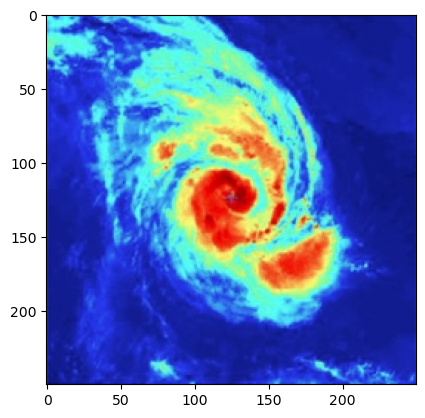

In [11]:
#print a random image from the dataset
import random
i = random.randint(0, 132)
print(i)
x = dataset[i][0]
y = dataset[i][1]
size = dataset[i][0].shape
print(f"[0]: {x} ,\n [1]:{y},\n size:{size}")
img, label = dataset[i]
size = img.shape
print(f"INTENSITY: {label} KNOTS")
print(f"SIZE: {size}\n")
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [19]:
for i in range(132):
  x, y = dataset[i]
  x = dataset[i][0]
  print(x)

tensor([[[0.1756, 0.1254, 0.1048,  ..., 0.0582, 0.0581, 0.0628],
         [0.1726, 0.1879, 0.1893,  ..., 0.0577, 0.0611, 0.0706],
         [0.1821, 0.1847, 0.1849,  ..., 0.0548, 0.0500, 0.0554],
         ...,
         [0.1543, 0.1452, 0.1347,  ..., 0.2163, 0.0901, 0.1680],
         [0.1661, 0.1549, 0.1434,  ..., 0.2038, 0.1198, 0.1722],
         [0.1762, 0.1614, 0.1456,  ..., 0.1936, 0.1964, 0.2127]],

        [[0.4030, 0.3504, 0.3068,  ..., 0.0974, 0.0984, 0.0981],
         [0.4071, 0.4147, 0.3990,  ..., 0.0969, 0.1014, 0.1059],
         [0.4205, 0.4130, 0.4043,  ..., 0.0938, 0.0878, 0.0907],
         ...,
         [0.2156, 0.2692, 0.3149,  ..., 0.3857, 0.2169, 0.2792],
         [0.2117, 0.2659, 0.3121,  ..., 0.3991, 0.2780, 0.3131],
         [0.2112, 0.2653, 0.3113,  ..., 0.4254, 0.3826, 0.3821]],

        [[0.9128, 0.8677, 0.8451,  ..., 0.5173, 0.5048, 0.5021],
         [0.9129, 0.9320, 0.9306,  ..., 0.5167, 0.5078, 0.5098],
         [0.9236, 0.9300, 0.9254,  ..., 0.5144, 0.5017, 0.

In [1]:
# RESIZE TO SAME
# DONE :D

In [2]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Flatten(),
        nn.Linear(784, 1),
    )
  def forward(self, x):
    return self.model(x)

In [5]:
model = Model().to('cpu')
summary(model, (3, 250, 250))
device='cpu'

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 256, 250, 250]           7,168
       BatchNorm2d-2        [-1, 256, 250, 250]             512
              ReLU-3        [-1, 256, 250, 250]               0
            Conv2d-4        [-1, 256, 250, 250]         590,080
       BatchNorm2d-5        [-1, 256, 250, 250]             512
              ReLU-6        [-1, 256, 250, 250]               0
         MaxPool2d-7        [-1, 256, 125, 125]               0
            Conv2d-8        [-1, 128, 125, 125]         295,040
       BatchNorm2d-9        [-1, 128, 125, 125]             256
             ReLU-10        [-1, 128, 125, 125]               0
           Conv2d-11        [-1, 128, 125, 125]         147,584
      BatchNorm2d-12        [-1, 128, 125, 125]             256
             ReLU-13        [-1, 128, 125, 125]               0
        MaxPool2d-14          [-1, 128,

In [14]:
loss_per_iteration = []
accuracy_per_iteration = []
def train_batch(epochs, model, criterion, optimizer, train_loader):
  total = 0
  correct = 0 
  samples = 0
  sum1 = 0
  count = 0
  for i in range(epochs):
    train_loss = 0.0
    for inputs, labels in train_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      
      outputs = model(inputs)
        
      labels = torch.unsqueeze(labels, 1)
      predicted = torch.max(outputs, 1)
    
      loss = criterion(outputs, labels) 
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      if predicted == labels:
        count+=1
        sum1+=count
    
      correct += sum1
      samples += labels.size(0)
    
      train_loss = train_loss + loss.item()

    print(f"Epoch: {i}/{epochs}, Loss: {train_loss/len(train_loader):.5f}")
    loss_per_iteration.append(train_loss/len(train_loader))
    accuracy_per_iteration.append(100*correct/samples)

In [ ]:
model = Model().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.001)

train_batch(epochs=50,
            model=model,
            criterion=criterion,
            optimizer=optimizer,
            train_loader = data_loader)

Epoch: 0/50, Loss: 2461.00183
Epoch: 1/50, Loss: 745.27763
Epoch: 2/50, Loss: 448.11829
Epoch: 3/50, Loss: 444.34199
Epoch: 4/50, Loss: 399.48638
Epoch: 5/50, Loss: 377.63522
Epoch: 6/50, Loss: 372.77210
Epoch: 7/50, Loss: 339.75063
Epoch: 8/50, Loss: 354.27903
Epoch: 9/50, Loss: 393.31324
Epoch: 10/50, Loss: 355.70648
Epoch: 11/50, Loss: 360.11280


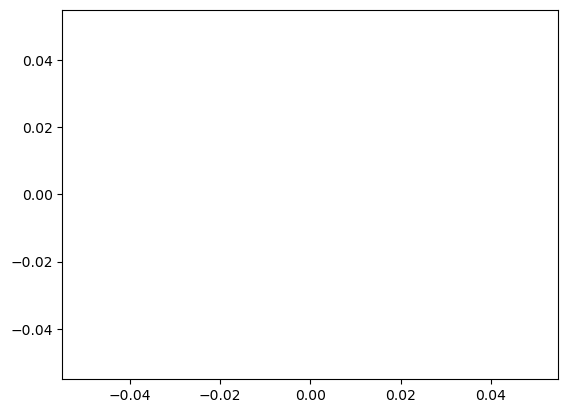

In [15]:
plt.plot(loss_per_iteration)

In [3]:
model = Model()
c = torch.load('saved_modelcyclone')
model.load_state_dict(c)

<All keys matched successfully>

In [6]:
img = cv2.imread('CYCLONE_DATASET_INFRARED/41.jpg')
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
img = img.to(device)
res = model(img)
res.detach().numpy()

array([[1.3379284]], dtype=float32)

### 96-112knots

In [90]:
img = cv2.imread('CYCLONE_DATASET_INFRARED/84(1).jpg')
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
img = img.to(device)
res = model(img)
res.detach().numpy()

array([[69.91196]], dtype=float32)

In [101]:
from pip._internal.utils.misc import get_installed_distributions
import sys
#import numpy as np # imported to test whether numpy shows up, which it does!

def get_imported_packages():
    p = get_installed_distributions()
    p = {package.key:package.version for package in p}

    imported_modules = set(sys.modules.keys())
    
    imported_modules.remove('pip')

    modules = [(m, p[m]) for m in imported_modules if p.get(m, False)]

    return modules


def generate_requirements(filepath:str, modules):
    with open(filepath, 'w') as f:
        for module, version in modules:
            f.write(f"{module}=={version}")


generate_requirements('requirements.txt', get_imported_packages())

D:\Anaconda\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [102]:
saved_path = './saved_modelcyclone'
torch.save(model.state_dict(), saved_path)

In [103]:
# torch.save(model.state_dict,'cyclonemodel2.h5')

In [104]:
# torch.save(model.state_dict,'cyclonemodel2.pth')

In [7]:
model= Model()
model.load_state_dict(torch.load('saved_modelcyclone', map_location=torch.device('cpu')))
model.eval()

Model(
  (model): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding

In [41]:
path = 'CYCLONE_DATASET_INFRARED/30.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
img = img.to(device)
model(img)

tensor([[48.3683]], grad_fn=<AddmmBackward0>)

In [8]:
path = 'CYCLONE_DATASET_INFRARED/41.jpg'
img = cv2.imread(path)
img = np.array(img)
totensor = transforms.ToTensor()
img = totensor(img)
resize = transforms.Resize(size=(250, 250))
img = resize(img)
img = torch.unsqueeze(img, 0)
# img = img.to(device)
model(img)

tensor([[39.9178]], grad_fn=<AddmmBackward0>)